In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [2]:
df = pd.read_csv("../homework1/car_fuel_efficiency.csv")

df.sample(5)

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
1003,200,5.0,125.0,3116.568770,16.1,2018,USA,Gasoline,Front-wheel drive,1.0,14.786988
7664,210,7.0,NaN,3293.240528,15.8,2007,USA,Diesel,Front-wheel drive,0.0,12.600861
5674,220,5.0,137.0,3313.628890,14.8,2003,Europe,Gasoline,All-wheel drive,1.0,13.024511
167,150,4.0,192.0,2824.478265,13.8,2002,Asia,Diesel,All-wheel drive,2.0,16.696031
5737,230,7.0,NaN,4366.357146,16.2,2016,Europe,Gasoline,Front-wheel drive,0.0,7.626868


In [4]:
df = df[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']].copy()

In [5]:
df.sample(10)

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
9375,250,191.0,2823.485354,2023,15.651553
9395,130,181.0,2831.466797,2005,16.286676
2967,270,141.0,1880.304306,2013,20.209353
9307,120,134.0,3197.580693,2007,14.392145
3422,270,146.0,3141.266582,2010,14.078700
9275,260,110.0,3808.541356,2002,10.043094
8524,210,130.0,2620.942414,2011,16.923885
5399,240,NaN,3433.433570,2008,12.911581
8609,270,110.0,3704.071050,2014,11.040243
7223,300,173.0,2842.628144,2021,16.859626


## EDA

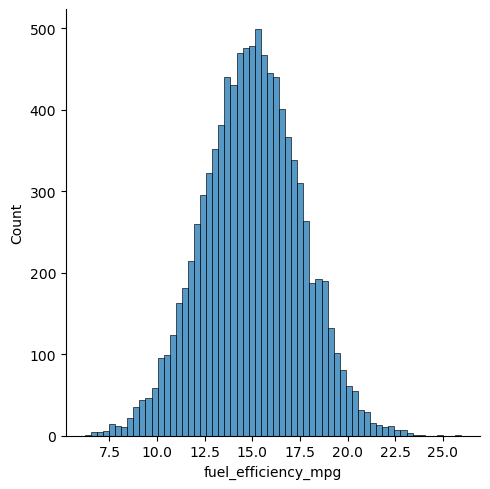

In [6]:
sns.displot(df['fuel_efficiency_mpg'])

The `fuel_efficiency_mpg` variable does not have long tail

## Q1

In [7]:
df.isna().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

## Q2

In [8]:
df['horsepower'].median()

149.0

## Q3

- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

In [9]:
df['horsepower_fillna_mean'] = df['horsepower'].fillna(df['horsepower'].mean())
df['horsepower_fillna_0'] = df['horsepower'].fillna(0)

In [38]:
X = df[['engine_displacement','horsepower','vehicle_weight','model_year']].copy()
y = df['fuel_efficiency_mpg'].copy()

In [11]:
# first split to get 60% training data & 20% test data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# second split to get 20% validation data
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [12]:
# fill simulation 1 with mean
X_train_fillna_mean = X_train.copy()
X_train_fillna_mean['horsepower'] = X_train_fillna_mean['horsepower'].fillna(X_train_fillna_mean['horsepower'].mean())

# fill simulation 2 with
X_train_fillna_0 = X_train.copy()
X_train_fillna_0['horsepower'] = X_train_fillna_0['horsepower'].fillna(0)

In [13]:
# fill simulation 1 with mean
X_val_fillna_mean = X_val.copy()
X_val_fillna_mean['horsepower'] = X_val_fillna_mean['horsepower'].fillna(X_val_fillna_mean['horsepower'].mean())

# fill simulation 2 with
X_val_fillna_0 = X_val.copy()
X_val_fillna_0['horsepower'] = X_val_fillna_0['horsepower'].fillna(0)

In [14]:
# fill simulation 1 with mean
X_test_fillna_mean = X_test.copy()
X_test_fillna_mean['horsepower'] = X_test_fillna_mean['horsepower'].fillna(X_test_fillna_mean['horsepower'].mean())

# fill simulation 2 with
X_test_fillna_0 = X_test.copy()
X_test_fillna_0['horsepower'] = X_test_fillna_0['horsepower'].fillna(0)

In [15]:
# Fill na with 0

model_fillna_0 = LinearRegression()
model_fillna_0.fit(X_train_fillna_0, y_train)

y_val_pred_fillna_0 = model_fillna_0.predict(X_val_fillna_0)
rmse_val_fillna_0 = root_mean_squared_error(y_val, y_val_pred_fillna_0)
print(f"Validation RMSE (fillna 0): {rmse_val_fillna_0}")

Validation RMSE (fillna 0): 0.517291936381243


In [16]:
# Fill na with mean

model_fillna_mean = LinearRegression()
model_fillna_mean.fit(X_train_fillna_mean, y_train)

y_val_pred_fillna_mean = model_fillna_mean.predict(X_val_fillna_mean)
rmse_val_fillna_mean = root_mean_squared_error(y_val, y_val_pred_fillna_mean)
print(f"Validation RMSE (fillna mean): {rmse_val_fillna_mean}")

Validation RMSE (fillna mean): 0.46036055087335576


## Q4

- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

In [18]:
r = [0, 0.01, 0.1, 1, 5, 10, 100]

In [26]:
for alpha in r:
    model_ridge = Ridge(alpha=alpha)
    model_ridge.fit(X_train_fillna_0, y_train)

    y_val_pred_ridge = model_ridge.predict(X_val_fillna_0)
    rmse_val_ridge = root_mean_squared_error(y_val, y_val_pred_ridge)
    print(f"Validation RMSE (Ridge alpha={alpha}): {round(rmse_val_ridge, 5)}")

Validation RMSE (Ridge alpha=0): 0.51729
Validation RMSE (Ridge alpha=0.01): 0.51729
Validation RMSE (Ridge alpha=0.1): 0.51729
Validation RMSE (Ridge alpha=1): 0.51729
Validation RMSE (Ridge alpha=5): 0.51729
Validation RMSE (Ridge alpha=10): 0.51729
Validation RMSE (Ridge alpha=100): 0.51729


In [27]:
for alpha in r:
    model_ridge = Ridge(alpha=alpha)
    model_ridge.fit(X_train_fillna_0, y_train)

    y_test_pred_ridge = model_ridge.predict(X_val_fillna_0)
    rmse_val_ridge = root_mean_squared_error(y_test, y_test_pred_ridge)
    print(f"Validation RMSE (Ridge alpha={alpha}): {round(rmse_val_ridge, 5)}")

Validation RMSE (Ridge alpha=0): 3.59433
Validation RMSE (Ridge alpha=0.01): 3.59433
Validation RMSE (Ridge alpha=0.1): 3.59433
Validation RMSE (Ridge alpha=1): 3.59433
Validation RMSE (Ridge alpha=5): 3.59433
Validation RMSE (Ridge alpha=10): 3.59433
Validation RMSE (Ridge alpha=100): 3.59433


In [25]:
for alpha in r:
    model_lasso = Lasso(alpha=alpha)
    model_lasso.fit(X_train_fillna_0, y_train)

    y_val_pred_lasso = model_lasso.predict(X_val_fillna_0)
    rmse_val_lasso = root_mean_squared_error(y_val, y_val_pred_lasso)
    print(f"Validation RMSE (Lasso alpha={alpha}): {round(rmse_val_lasso, 5)}")

/usr/local/Caskroom/miniconda/base/envs/da_env/lib/python3.11/site-packages/sklearn/base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/Caskroom/miniconda/base/envs/da_env/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/Caskroom/miniconda/base/envs/da_env/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.812e+02, tolerance: 3.819e+00
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers imp

Validation RMSE (Lasso alpha=0): 0.51729
Validation RMSE (Lasso alpha=0.01): 0.51727
Validation RMSE (Lasso alpha=0.1): 0.51726
Validation RMSE (Lasso alpha=1): 0.51736
Validation RMSE (Lasso alpha=5): 0.52586
Validation RMSE (Lasso alpha=10): 0.54567
Validation RMSE (Lasso alpha=100): 0.5801


## Q5

- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

In [30]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

for seed in seeds:
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=seed)

    # second split to get 20% validation data
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=seed)

    # model training
    model = LinearRegression()
    model.fit(X_train.fillna(0), y_train)

    y_val_pred = model.predict(X_val.fillna(0))
    rmse_val = root_mean_squared_error(y_val_pred, y_val)
    rmse_scores.append(rmse_val)
    print(f"Validation RMSE (Linear Regression seed={seed}): {round(rmse_val, 3)}")

Validation RMSE (Linear Regression seed=0): 0.518
Validation RMSE (Linear Regression seed=1): 0.517
Validation RMSE (Linear Regression seed=2): 0.52
Validation RMSE (Linear Regression seed=3): 0.522
Validation RMSE (Linear Regression seed=4): 0.511
Validation RMSE (Linear Regression seed=5): 0.515
Validation RMSE (Linear Regression seed=6): 0.515
Validation RMSE (Linear Regression seed=7): 0.536
Validation RMSE (Linear Regression seed=8): 0.519
Validation RMSE (Linear Regression seed=9): 0.52


In [32]:
round(np.std(rmse_scores),3)

np.float64(0.006)

## Q6

- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

model = Lasso(alpha=0.001)
model.fit(X_train.fillna(0), y_train)

y_test_pred = model.predict(X_test.fillna(0))
rmse_test = root_mean_squared_error(y_test_pred, y_test)
print(f"Test RMSE (Lasso Regression): {rmse_test}")

Test RMSE (Lasso Regression): 0.5210298381869958


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

model = Ridge(alpha=0.001)
model.fit(X_train.fillna(0), y_train)

y_test_pred = model.predict(X_test.fillna(0))
rmse_test = root_mean_squared_error(y_test_pred, y_test)
print(f"Test RMSE (Ridge Regression): {rmse_test}")

Test RMSE (Ridge Regression): 0.5210335981909543
